In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install nltk spacy
  

  Using cached typer-0.16.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.33.2-cp311-cp311-win_amd64.whl.metadata (6.9 kB)
  Using cached typing_inspection-0.4.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/14.9 MB 7.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.8/14.9 MB 4.0 MB/s eta 0:00:


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
print("Pandas and NumPy are working!")


Pandas and NumPy are working!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [1]:
!pip install kaggle
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Priyanka Sati\AppData\Local\Programs\Python\Python311\Scripts\kaggle.exe\__main__.py", line 7, in <module>
  File "C:\Users\Priyanka Sati\AppData\Local\Programs\Python\Python311\Lib\site-packages\kaggle\cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Priyanka Sati\AppData\Local\Programs\Python\Python311\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Priyanka Sati\AppData\Local\Programs\Python\Python311\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 688, in build_kaggle_client
    username=sel

In [2]:
!pip install kaggle
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/41.0M [00:00<?, ?B/s]
100%|##########| 41.0M/41.0M [00:00<00:00, 488MB/s]


In [3]:
!python -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------------- ---------------- 1.0/1.8 MB 5.6 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


In [5]:
# Fake News Detection Project

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 2: Load dataset
true_df = pd.read_csv("fake_news_dataset/True.csv")
fake_df = pd.read_csv("fake_news_dataset/Fake.csv")

# Step 3: Add labels
true_df["label"] = 1  # Real news
fake_df["label"] = 0  # Fake news

# Step 4: Combine and shuffle
news_df = pd.concat([true_df, fake_df], ignore_index=True)
news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Basic cleanup
news_df = news_df[["title", "text", "label"]]
news_df.dropna(inplace=True)

# Step 6: Data split
X = news_df["text"]
y = news_df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 8: Model training
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_tfidf, y_train)

# Step 9: Evaluation
y_pred = model.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

# Step 10: Predict custom input
sample = ["Breaking news! The government announces new reforms in education sector."]
sample_tfidf = tfidf.transform(sample)
result = model.predict(sample_tfidf)
print("\nPrediction for custom input:", "Real" if result[0] == 1 else "Fake")


FileNotFoundError: [Errno 2] No such file or directory: 'fake_news_dataset/True.csv'

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load datasets
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

# Add labels
true_df["label"] = 1  # Real news
fake_df["label"] = 0  # Fake news

# Combine
data = pd.concat([true_df, fake_df])

# Use only title and text columns
data = data[["title", "text", "label"]]
data.dropna(inplace=True)

# Split data
X = data["text"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train model
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_vec)
score = accuracy_score(y_test, y_pred)

print(f"Accuracy: {round(score * 100, 2)}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 99.41%
Confusion Matrix:
 [[4617   33]
 [  20 4310]]


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


NameError: name 'cm' is not defined

In [9]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)


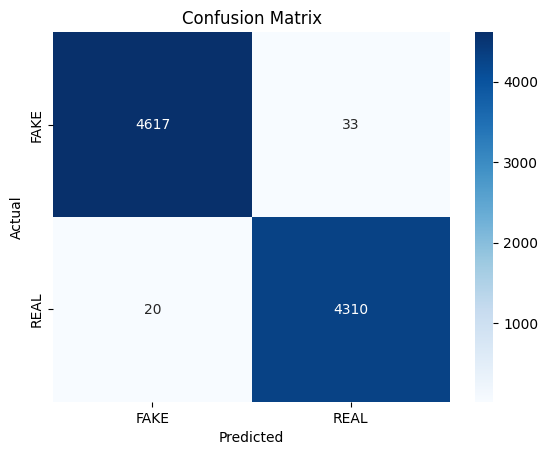

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["FAKE", "REAL"]))


              precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99      4650
        REAL       0.99      1.00      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [12]:
loaded_model = joblib.load("fake_news_detector.pkl")


NameError: name 'joblib' is not defined

In [13]:
import joblib

loaded_model = joblib.load("fake_news_detector.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'fake_news_detector.pkl'

In [14]:
import joblib

joblib.dump(model, "fake_news_detector.pkl")  # saves the model
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")  # optionally save vectorizer too


['tfidf_vectorizer.pkl']

In [15]:
import joblib

loaded_model = joblib.load("fake_news_detector.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [16]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'fake-and-real-news-dataset', 'fake-and-real-news-dataset.zip', 'Fake.csv', 'FakeNews.ipynb', 'fake_news_detector.pkl', 'GATE MOCK TEST 1.pdf', 'history class 12.pdf', 'My Music', 'My Pictures', 'My Videos', 'priyankaresume..pdf', 'PRIYANKA_22CS18,_TANISHKA22CS24[1].pdf', 'tfidf_vectorizer.pkl', 'True.csv', '🧠 GATE General Aptitude Practice Questions.pdf']


In [17]:
import joblib
joblib.dump(model, "fake_news_detector.pkl")        # Save model
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")     # Save vectorizer (optional)


['tfidf_vectorizer.pkl']